In [23]:
import hist
import pickle as pkl
from unfold_utils.unfolder import *
import ipywidgets as widgets
from IPython.display import display
from unfold_utils.draw_tools import * 
from unfold_utils.integrate_and_rebin import *
import mplhep as hep

import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the color cycle to 'tab10', which has 10 distinct colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.cm.tab10.colors)

# plt.cm.Set3.colors → 12 pastel colors
# plt.cm.Paired.colors → 12 high-contrast colors
# plt.cm.Dark2.colors → 8 dark, distinguishable colors (not exactly 10)
# plt.cm.Accent.colors → 8 colors
# plt.cm.tab20.colors → 20 colors (if you need more variety)

In [24]:
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-480 GeV",  r"$p_T$ 480-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]

In [25]:
closure  = False
groomed = True

In [26]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'

In [27]:
with open('latest_pkl/pythia_syst_0703.pkl', "rb") as f:
    output_pythia= pkl.load( f )
with open("latest_pkl/data_combined_0703.pkl", "rb") as f:
    output_data = pkl.load( f )

with open("latest_pkl/herwig_0703.pkl", "rb") as f:
    output_herwig = pkl.load( f )
    
with open('latest_pkl/backgrounds_0703.pkl', "rb") as f:
    output_bg= pkl.load( f )

with open('latest_pkl/pythia_jk_0703.pkl', "rb") as f:
    output_jk= pkl.load( f )

with open('latest_pkl/data_jk_0903.pkl', "rb") as f:
    output_data_jk= pkl.load( f )
    


if not groomed:
    resp_matrix_4d = output_pythia['response_matrix_u']
    input_data = output_data['ptjet_mjet_u_reco']
    fakes = output_pythia['fakes_u']
    misses = output_pythia['misses_u']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    fakes_herwig = output_herwig['fakes_u']
    misses_herwig = output_herwig['misses_u']
    input_data_jk = output_data_jk["jk_ptjet_mjet_u_reco"]
else:
    resp_matrix_4d = output_pythia['response_matrix_g']
    input_data = output_data['ptjet_mjet_g_reco']
    fakes = output_pythia['fakes_g']
    misses = output_pythia['misses_g']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    fakes_herwig = output_herwig['fakes_g']
    misses_herwig = output_herwig['misses_g']
    input_data_jk = output_data_jk["jk_ptjet_mjet_g_reco"]

/home/aritra/.local/share/pipx/venvs/jupyterlab/lib/python3.12/site-packages/hist/basehist.py:417: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


In [28]:
resp_matrix_4d.axes['mreco'].edges

array([0.0e+00, 2.5e+00, 5.0e+00, 7.5e+00, 1.0e+01, 1.5e+01, 2.0e+01,
       3.0e+01, 4.0e+01, 5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01,
       1.0e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02,
       1.7e+02, 1.8e+02, 1.9e+02, 2.0e+02, 5.0e+02, 1.3e+04])

In [29]:
if not groomed:
    edges = [ 0, 10, 2.0e+01, 30,   4.0e+01,
           5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
           1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    edges_gen = [ 0,  2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
           1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]
if groomed:
    edges = [ 0, 5, 10,  15, 2.0e+01, 30,   4.0e+01,
           5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
           1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    edges_gen = [ 0, 10, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
           1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )




fakes =  rebin_hist(fakes, 'mreco',edges )
misses = rebin_hist(misses, 'mgen',edges_gen )
hist_bg = rebin_hist(hist_bg, 'mreco',edges )
input_data = rebin_hist(input_data, 'mreco',edges)

In [30]:
input_data_jk = rebin_hist(input_data_jk, 'mreco', resp_matrix_4d.axes['mreco'].edges )

In [31]:
unfolder_orig = Unfolder(input_data, 
                    resp_matrix_4d[{'systematic':'nominal'}] ,
                    #resp_matrix_4d_jk,
                    fakes = fakes,
                    misses = misses,
                    #backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                    #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                    #systematics = sys_matrix_dic,
                    systematics= None,
                    #systematics = jes_sys_list_up,
                    closure = closure,
                    groomed = groomed,
                    is_uf = True,
                    merge = False,
                    normalised_xs = True,
                    do_syst = True,
                    discard_low_bins = False,
                    regularisation= 'ScanSURE',
                    do_norm = False
                           )
unfolder_orig.perform_unfold()
orig_results = unfolder_orig.get_results()[0]

11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 5.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (88,)
Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 3.4479234513090075e-06
Output Underflow 0.0, output overflow 0.0
261065.80682007468
423113.42383632145


Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 88 input bins and 44 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #45
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfoldDensity::ScanSURE>: logtau=-8.000000 Chi2A=353.987553 SURE=441.987553 DF=44.000000 X=2.548988 Y=11.181890
Info in <TUnfoldDensity::ScanSURE>: log

In [32]:
if groomed:
    key = 'response_matrix_g'
else:
    key = 'response_matrix_u'

unfolded_list = []
for ijk in [0,1,2,3,4,5,6,7,8,9]:
    input_data = input_data_jk[:,:,ijk]
    input_data = (234412.0/input_data.sum()) * input_data
    unfolder = Unfolder(input_data_jk[:,:,ijk], 
                        resp_matrix_4d[{'systematic':'nominal'}] ,
                        #resp_matrix_4d_jk,
                        fakes = fakes,
                        misses = misses,
                        #backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                        #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                        #systematics = sys_matrix_dic,
                        systematics= None,
                        #systematics = jes_sys_list_up,
                        closure = closure,
                        groomed = groomed,
                        is_uf = True,
                        merge = False,
                        normalised_xs = True,
                        do_syst = True,
                        discard_low_bins = False,
                        regularisation= 'ScanSURE',
                        do_norm = False
                               )
    unfolder.perform_unfold()
    unfolded_list.append(unfolder.get_results()[0])


11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 5.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (88,)
Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 4.788042766541271e-06
Output Underflow 0.0, output overflow 0.0
197852.35877339117
319848.6551099018
11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 5.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (88,)
Working until background subtractions
Unfolder object created
Regularisation U

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 88 input bins and 44 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #45
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfoldDensity::ScanSURE>: logtau=-8.000000 Chi2A=309.280880 SURE=397.280880 DF=44.000000 X=2.490353 Y=10.927411
Info in <TUnfoldDensity::ScanSURE>: log

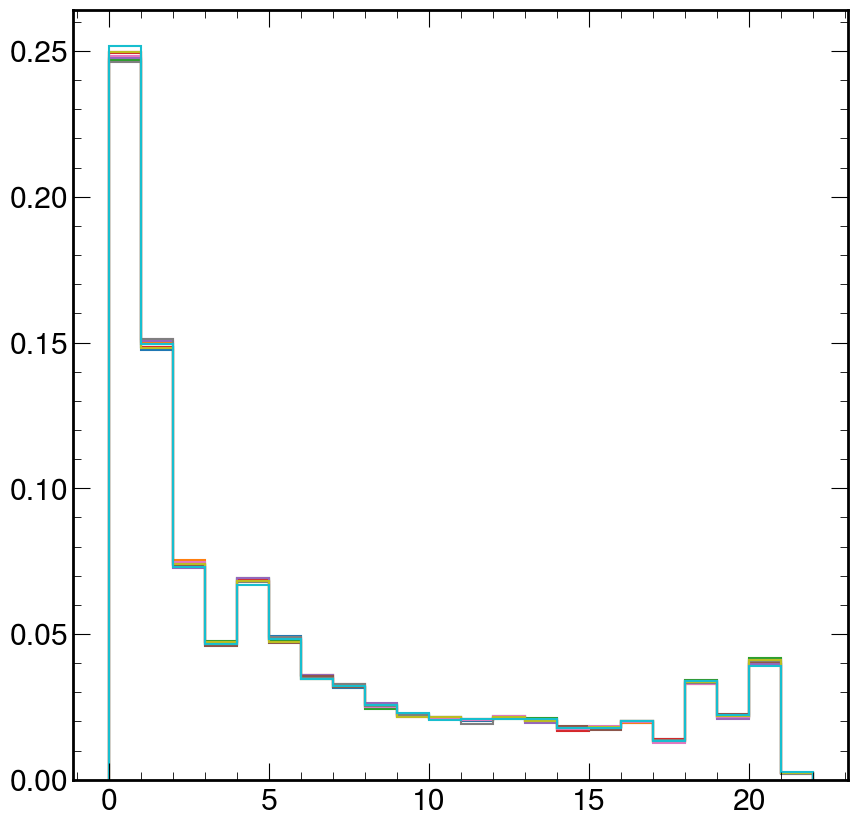

In [33]:
for ijk in [0,1,2,3,4,5,6,7,8,9]:
    hep.histplot(input_data_jk[3,:,ijk].values(), density = 1)
    

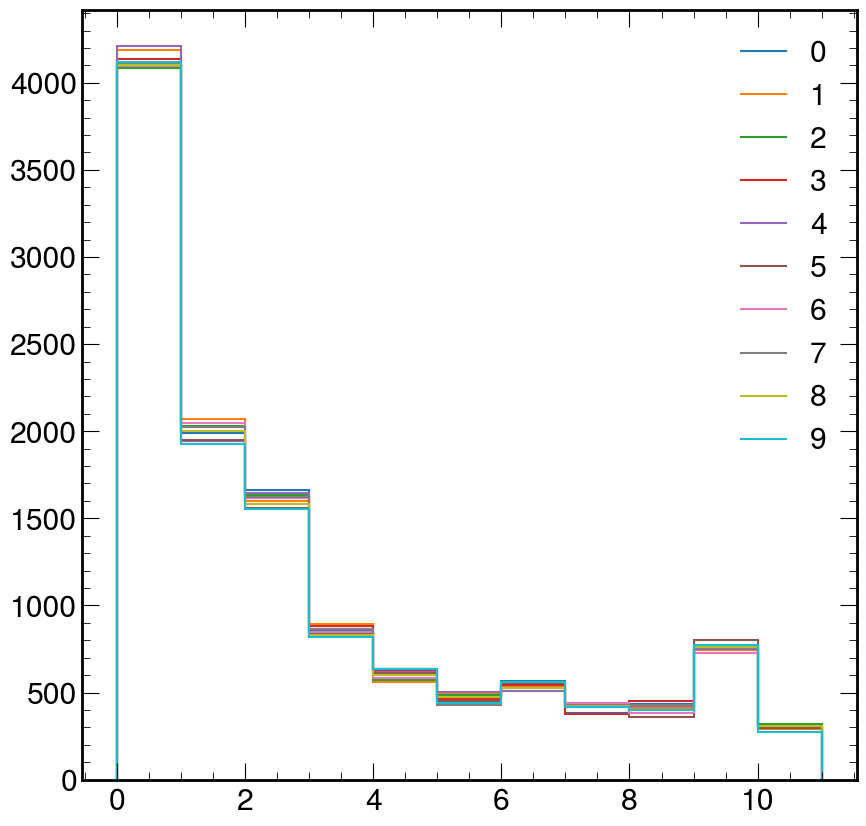

In [34]:
for ijk in range(len(unfolded_list)):
    hep.histplot(unfolded_list[ijk][3], label = str(ijk))
    plt.legend()

In [35]:
unfolded_list = np.array(unfolded_list)

std_list = np.std(unfolded_list, axis = 0)

In [36]:
std_list[3]

array([40.10673627, 46.76963415, 34.43560339, 21.85258068, 25.55027152,
       22.38677029, 17.91265645, 18.82896686, 26.28992666, 18.425213  ,
       11.63923206])

In [37]:
unfolded_list[3][3]

array([4135.45932305, 1945.26464174, 1621.11289106,  882.72335978,
        624.48950383,  463.50295693,  541.42167277,  378.98755124,
        451.58275929,  752.06056846,  299.097821  ])

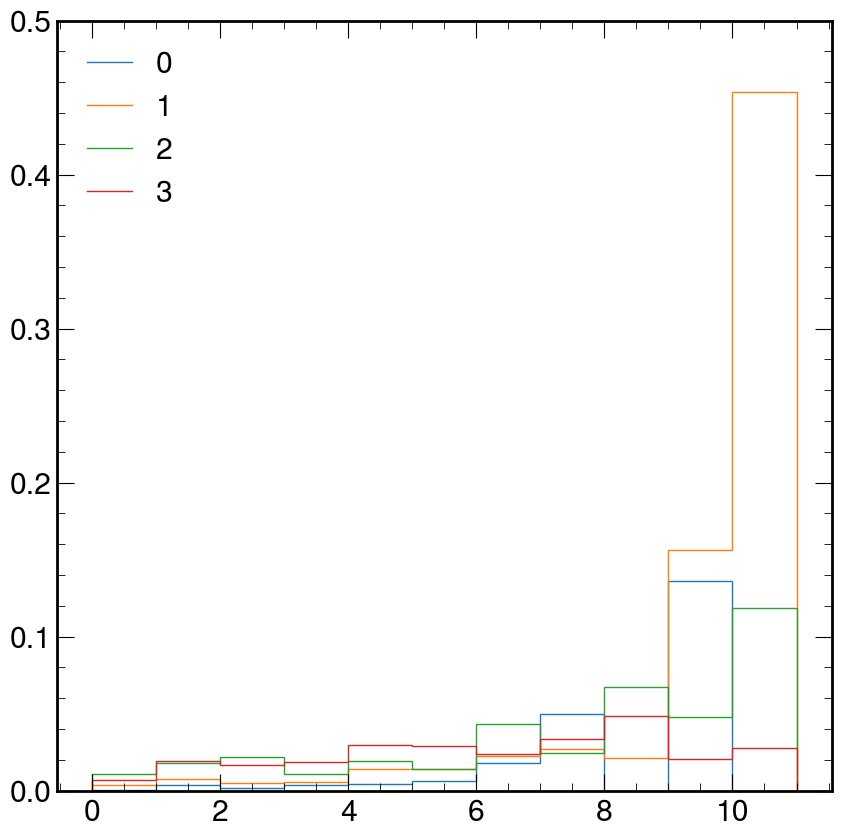

In [38]:
for ipt in range(4):
    plt.ylim(0,0.5)
    plt.stairs(std_list[ipt]/orig_results[ipt], label = str(ipt))
    plt.legend()

In [44]:
if not groomed:
    stat_mat = np.loadtxt("stat_mat_ungroomed.txt")
else:
    stat_mat = np.loadtxt("stat_mat_groomed.txt")
stat_input = std_list

In [45]:
stat_dic = {}
for ipt in range(4):
    stat_dic[ipt] = np.sqrt(stat_mat[ipt]**2 + stat_input[ipt]**2)

In [46]:
stat_input[0].shape

(11,)

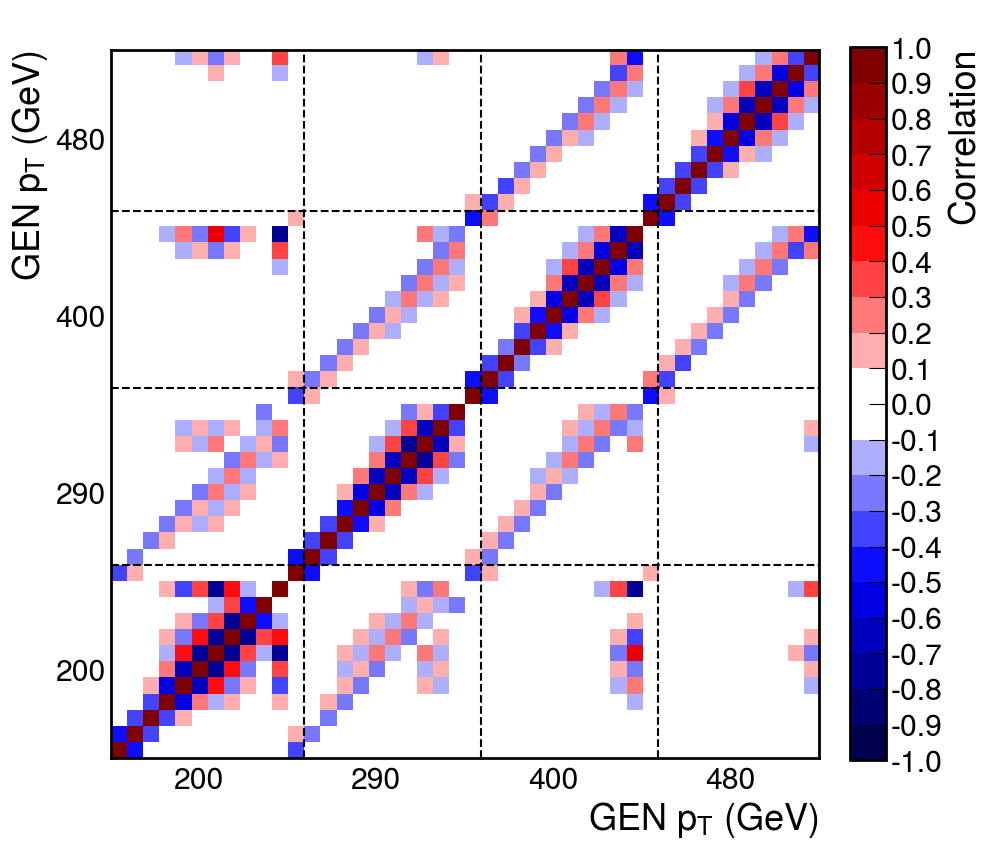

In [47]:
unfolder_orig.plot_correlation()
corr_matrix = unfolder_orig.corr_matrix

In [48]:
if not groomed:
    corr_12 = corr_matrix[30+1, 30+2]
    corr_45 = corr_matrix[30+4, 30+5]
    total_sys_final_bin = stat_dic[ipt]
    
    
    s1 = total_sys_final_bin[0]
    s2 = total_sys_final_bin[1]
    s4 =  total_sys_final_bin[4]
    s5 =  total_sys_final_bin[5]
    
    s1 = np.sqrt(s1**2 + s2**2 + 2*corr_12*s1*s2)
    s4 = np.sqrt(s4**2 + s5**2 + 2*corr_45*s4*s5)
    
    total_sys_final_bin[4] = s4
    total_sys_final_bin = np.delete(total_sys_final_bin, 5)
    total_sys_final_bin[1] = s1
    total_sys_final_bin = np.delete(total_sys_final_bin, 2)
else:
    corr_34 = corr_matrix[30+3, 30+4]
    corr_56 = corr_matrix[30+5, 30+6]
    total_sys_final_bin = stat_dic[ipt]
    
    s3 = total_sys_final_bin[2]
    s4 = total_sys_final_bin[3]
    s5 = total_sys_final_bin[4]
    s6 = total_sys_final_bin[5]
    
    s3 = np.sqrt(s3**2 + s4**2 + 2*corr_34*s3*s4)
    s5 = np.sqrt(s5**2 + s6**2 + 2*corr_56*s5*s6)
    
    total_sys_final_bin[3] = s3
    total_sys_final_bin = np.delete(total_sys_final_bin, 4)
    total_sys_final_bin[5] = s5
    total_sys_final_bin = np.delete(total_sys_final_bin, 6)


In [49]:
stat_dic[3]  = total_sys_final_bin

In [50]:
import pickle
if groomed:
    with open("total_stat_groomed.pkl", "wb") as f:
        pickle.dump(stat_dic, f)
else:
    with open("total_stat_ungroomed.pkl", "wb") as f:
        pickle.dump(stat_dic, f)

{0: array([245.22157168, 419.53248264, 400.18586221, 236.43629008,
        168.25498714,  88.91629315,  53.5659212 ,  55.10054811,
        227.38342114,   0.        ]),
 1: array([201.68515926, 406.76426228, 305.84463242, 124.91973596,
        105.79904102,  90.03045133,  90.36029681,  44.46288844,
         34.01256687,   8.47452981]),
 2: array([ 99.89579754, 244.47857753, 204.06175135, 152.62064007,
         89.75996848,  59.36799121,  36.50743462,  25.14089129,
         32.52480897,   9.46180482]),
 3: array([ 84.64336135, 223.13926193, 258.20264665, 190.48989291,
         77.63890074,  71.54179222,  42.22520699,  26.50253939,
         19.04544122,   7.52367713])}